In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
df = pd.read_csv(r"C:\Users\lenovo\Downloads\Virtual Internship 2020\ANZ Virtual Internship\ANZ_synthesised_transaction_dataset_raw.csv")
df.head(3)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit


In [3]:
## Check datatype of columns of dataframe and shape of a df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   status             12043 non-null  object 
 1   card_present_flag  7717 non-null   float64
 2   bpay_biller_code   885 non-null    object 
 3   account            12043 non-null  object 
 4   currency           12043 non-null  object 
 5   long_lat           12043 non-null  object 
 6   txn_description    12043 non-null  object 
 7   merchant_id        7717 non-null   object 
 8   merchant_code      883 non-null    float64
 9   first_name         12043 non-null  object 
 10  balance            12043 non-null  float64
 11  date               12043 non-null  object 
 12  gender             12043 non-null  object 
 13  age                12043 non-null  int64  
 14  merchant_suburb    7717 non-null   object 
 15  merchant_state     7717 non-null   object 
 16  extraction         120

In [4]:
## Decribe dataframe like mean, minnimum and maximum value
df.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


In [5]:
## Find number of null values in dataframe 
df.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [7]:
## Check currency used  
df.currency.unique()

array(['AUD'], dtype=object)

In [8]:
df.groupby(['movement']).sum()

,card_present_flag,merchant_code,balance,age,amount
movement,,,,,
credit,0.0,0.0,1.434244e+07,28814,1676576.85
debit,6194.0,0.0,1.627402e+08,339489,586707.35


In [9]:
## Check the mean or average amount & balance spent through credit or debit card
df.groupby(['movement']).mean()

,card_present_flag,merchant_code,balance,age,amount
movement,,,,,
credit,NaN,0.0,16242.859049,32.631937,1898.728029
debit,0.802644,NaN,14582.453630,30.420161,52.572343


In [10]:
## Check the mean or average amount & balance spent by different gender
df.groupby(['gender']).mean()

,card_present_flag,merchant_code,balance,age,amount
gender,,,,,
F,0.803211,0.0,12061.260431,30.460750,168.517303
M,0.802075,0.0,17125.519410,30.693715,205.721809


In [11]:
## Check the total amount & balance in different card 
df.groupby(['movement']).sum()

,card_present_flag,merchant_code,balance,age,amount
movement,,,,,
credit,0.0,0.0,1.434244e+07,28814,1676576.85
debit,6194.0,0.0,1.627402e+08,339489,586707.35


In [12]:
## Find average amount of money spent by state and also their average age
df.groupby(['merchant_state']).mean()

,card_present_flag,merchant_code,balance,age,amount
merchant_state,,,,,
ACT,0.876712,NaN,12489.304384,30.506849,66.803836
NSW,0.789304,NaN,9448.416763,29.841402,47.036316
NT,0.814634,NaN,5542.410195,27.097561,44.726293
QLD,0.813625,NaN,7092.003541,29.913882,34.372397
SA,0.797590,NaN,11150.330096,30.891566,40.425470
TAS,0.882353,NaN,11431.072941,34.205882,28.866618
VIC,0.806664,NaN,19653.248109,32.043172,41.099953
WA,0.795455,NaN,9769.532018,26.752727,30.901873


In [13]:
## Create a copy of dataframe & analyse
df_copy = df.copy()

### Drop column which contains blank values

In [14]:
df_copy.dropna(axis=1, inplace =True)
df_copy.head(3)

,status,account,currency,long_lat,txn_description,first_name,balance,date,gender,age,extraction,amount,transaction_id,country,customer_id,movement
0,authorized,ACC-1598451071,AUD,153.41 -27.95,POS,Diana,35.39,01-08-18,F,26,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,debit
1,authorized,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,Diana,21.20,01-08-18,F,26,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,debit
2,authorized,ACC-1222300524,AUD,151.23 -33.94,POS,Michael,5.71,01-08-18,M,38,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,debit


In [15]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   status           12043 non-null  object 
 1   account          12043 non-null  object 
 2   currency         12043 non-null  object 
 3   long_lat         12043 non-null  object 
 4   txn_description  12043 non-null  object 
 5   first_name       12043 non-null  object 
 6   balance          12043 non-null  float64
 7   date             12043 non-null  object 
 8   gender           12043 non-null  object 
 9   age              12043 non-null  int64  
 10  extraction       12043 non-null  object 
 11  amount           12043 non-null  float64
 12  transaction_id   12043 non-null  object 
 13  country          12043 non-null  object 
 14  customer_id      12043 non-null  object 
 15  movement         12043 non-null  object 
dtypes: float64(2), int64(1), object(13)
memory usage: 893.9+ K

In [16]:
df_copy.isnull().sum()

status             0
account            0
currency           0
long_lat           0
txn_description    0
first_name         0
balance            0
date               0
gender             0
age                0
extraction         0
amount             0
transaction_id     0
country            0
customer_id        0
movement           0
dtype: int64

In [17]:
## Numerical data contains only numerical variables of dataframe
numerical_data = df_copy.select_dtypes(exclude = [object])
numerical_data.shape

(12043, 3)

In [18]:
## Correltaion between numerical variables
corr_matrix = numerical_data.corr()
corr_matrix

,balance,age,amount
balance,1.000000,0.199329,0.059178
age,0.199329,1.000000,0.029980
amount,0.059178,0.029980,1.000000


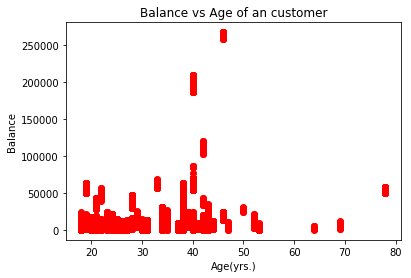

In [19]:
## Scatter plot creation between balance with respect to age of an customers
plt.scatter(df['age'], df['balance'], c='red')
plt.xlabel("Age(yrs.)")
plt.ylabel("Balance")
plt.title("Balance vs Age of an customer")
plt.show()

Text(0.5, 1.0, 'Amount vs Age of an customer')

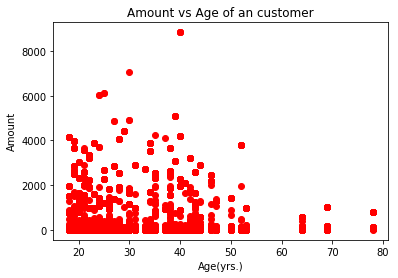

In [20]:
## Scatter plot creation between Age of an customers and Amount 
plt.scatter(df['age'], df['amount'], c='red')
plt.xlabel("Age(yrs.)")
plt.ylabel("Amount")
plt.title("Amount vs Age of an customer")

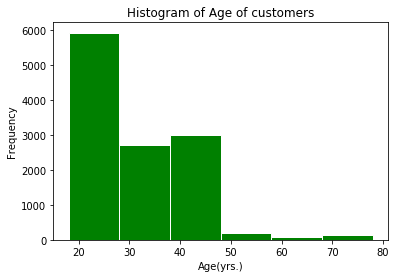

In [21]:
## Frequency Distribution of different Age group of customers.
plt.hist(df['age'], color='green', edgecolor='white', bins=6)
plt.title("Histogram of Age of customers")
plt.xlabel("Age(yrs.)")
plt.ylabel("Frequency")
plt.show()

In [22]:
## Check mode of transaction of money
df_copy.groupby(['txn_description']).mean()

,balance,age,amount
txn_description,,,
INTER BANK,23823.345997,30.991914,86.699461
PAY/SALARY,16242.859049,32.631937,1898.728029
PAYMENT,19093.423212,31.265000,77.613077
PHONE BANK,37736.789703,32.594059,106.099010
POS,11870.974148,30.084325,40.407412
SALES-POS,11871.135859,30.021098,39.909789
